# Income Census Data

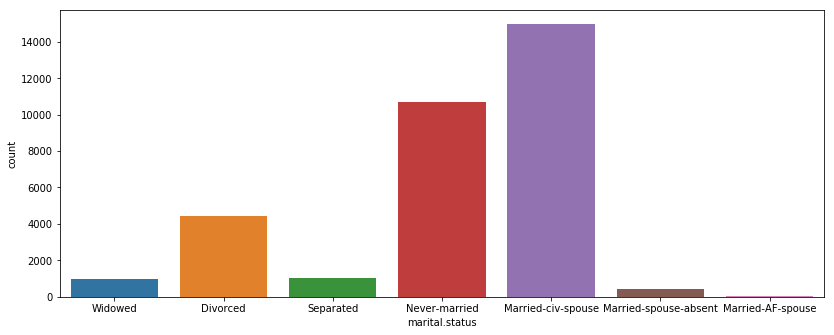

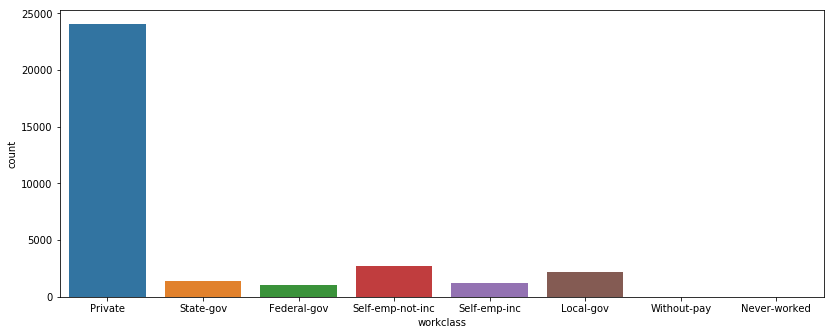

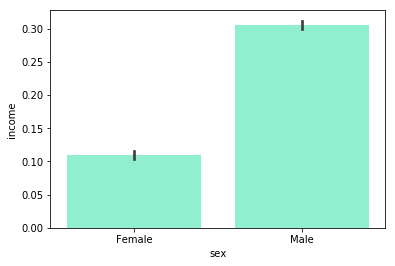

LR: 0.796806 (0.003376)
LDA: 0.810156 (0.004673)
KNN: 0.774857 (0.005417)
CART: 0.783170 (0.005669)
RF: 0.839885 (0.003906)


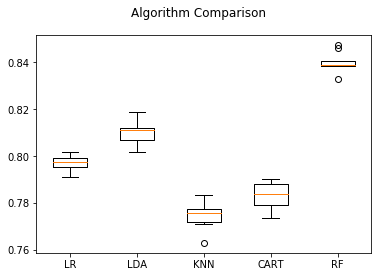

Accuracy: 83.40498710232158%
[[5767  426]
 [ 925 1023]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6193
           1       0.71      0.53      0.60      1948

   micro avg       0.83      0.83      0.83      8141
   macro avg       0.78      0.73      0.75      8141
weighted avg       0.82      0.83      0.83      8141



In [26]:
#TO IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

data=pd.read_csv('adult.csv', na_values=["?"])
data.isnull().sum()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#train=wf
#data = train.merge(store, how='left').merge(feature, how='left')

data.income=le.fit_transform(data.income)
#sns.countplot(data['income'],label="Count")
#data.replace('?', 'NaN') 
#data.replace({'?': '    '}, inplace=True)
#data.replace('?', np.NaN)

#data.isnull().sum()
data['workclass'].fillna(method='bfill',inplace=True)
data['occupation'].fillna(method='bfill',inplace=True)
data['native.country'].fillna(method='bfill',inplace=True)

y=data['income']
data
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 5.27)
sns.countplot(data['marital.status'],data=data)
plt.show()
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 5.27)
sns.countplot(data['workclass'],data=data)
plt.show()
sns.barplot('sex', y, data=data, color="aquamarine")
plt.show()
# #data.isnull().sum()
data['marital.status']=le.fit_transform(data['marital.status'])
#Actual
#data.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
#My
data['occupation']=le.fit_transform(data['occupation'])
data['workclass']=le.fit_transform(data['workclass'])



data.drop(labels=["marital.status","education","relationship","race","native.country"], axis = 1, inplace = True)

data.sex=le.fit_transform(data.sex)



from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=100)
model.fit(data,y)
pd.Series(model.feature_importances_,index=data.columns).sort_values(ascending=False)


y=data['income']
data=data.drop(labels=['income'],axis=1)
seed = 7
num_folds = 10
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25,random_state=seed)



num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#modelrf=RandomForestClassifier(n_estimators =40)
#modelrf.fit(X_train,y_train)


#model=LogisticRegression()
#model.fit(X_train,y_train)
#modelrf.score(X_test,y_test)

random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))